In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [4]:
# reading the excel file
df=pd.read_excel("REGNANDATA1.xlsx")

In [5]:
df.head()

,MONTH,Credit Card POS Count,Debit Card POS Count,RTGS,NEFT
0,Jan 2015,17947247.0,11151245.0,889032.0,16342282.0
1,Feb 2015,15602279.0,10288412.0,865068.0,19244474.0
2,Mar 2015,NaN,11582587.0,1072737.0,26906303.0
3,Apr 2015,18188579.0,12044987.0,895710.0,17862349.0
4,May 2015,19313259.0,13368953.0,NaN,21496984.0


C:\Users\navod\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\navod\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


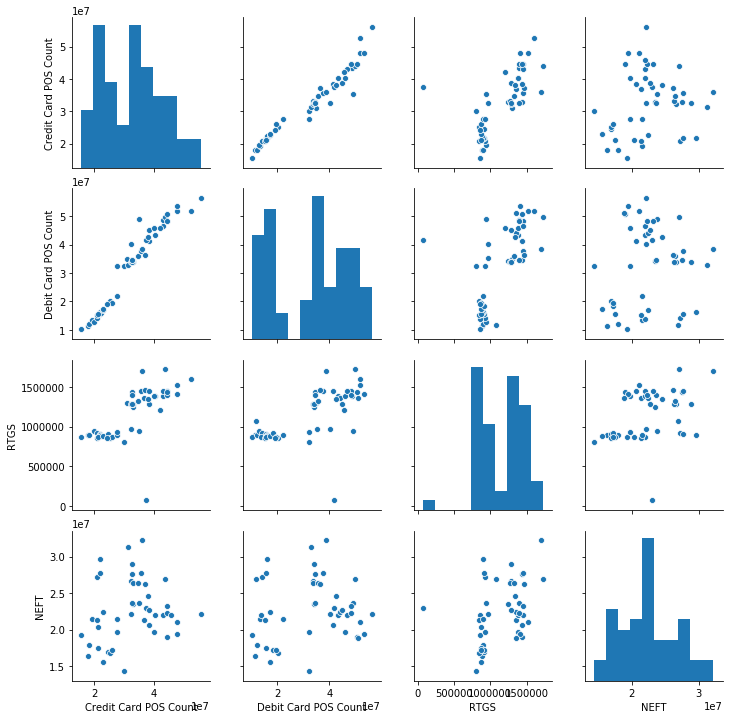

In [6]:
# plotting seaborn pairplot
sns.pairplot(df)

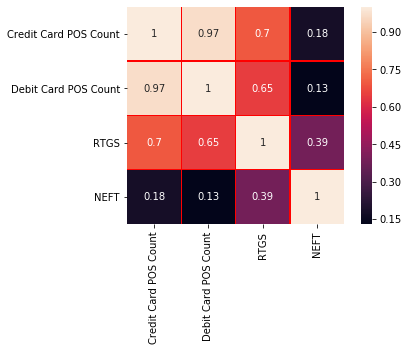

In [7]:
# plotting the seaborn heatmap
sns.heatmap(df.corr(),linewidth=0.2,vmax=1.0,square=True,linecolor='red',annot=True)

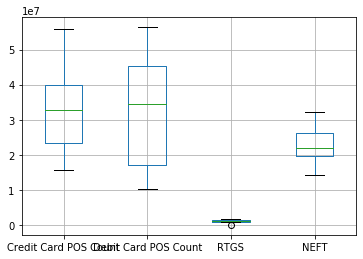

In [8]:
df.boxplot()

In [9]:
# extracting features and labels
#features=df.iloc[:,0:-1].values
#labels=df.iloc[:,-1].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
MONTH                    60 non-null object
Credit Card POS Count    54 non-null float64
Debit Card POS Count     56 non-null float64
RTGS                     55 non-null float64
NEFT                     52 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [10]:
df1=df.fillna(df.mean())
df1.head()

,MONTH,Credit Card POS Count,Debit Card POS Count,RTGS,NEFT
0,Jan 2015,1.794725e+07,11151245.0,8.890320e+05,16342282.0
1,Feb 2015,1.560228e+07,10288412.0,8.650680e+05,19244474.0
2,Mar 2015,3.273981e+07,11582587.0,1.072737e+06,26906303.0
3,Apr 2015,1.818858e+07,12044987.0,8.957100e+05,17862349.0
4,May 2015,1.931326e+07,13368953.0,1.149440e+06,21496984.0


In [11]:
df1.isnull().mean()

MONTH                    0.0
Credit Card POS Count    0.0
Debit Card POS Count     0.0
RTGS                     0.0
NEFT                     0.0
dtype: float64

In [12]:
X=df1[['Credit Card POS Count','Debit Card POS Count','RTGS']]
Y=df1[['NEFT']]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
X_train.shape,X_test.shape
print()

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("intercept:",reg.intercept_)
print("coefficient:",reg.coef_)

intercept: [17031995.04801073]
coefficient: [[ 1.57770867e-03 -4.09256076e-03  4.67397527e+00]]


In [17]:
y_train_pred = reg.predict(X_train)
RMSE_TRAIN = np.sqrt(np.mean((np.array(y_train) -np.array( y_train_pred))**2))
print("RMSE TRAIN:",RMSE_TRAIN)
MSE_TRAIN=RMSE_TRAIN**2
print("MSE TRAIN :",MSE_TRAIN)

RMSE TRAIN: 3483691.621431833
MSE TRAIN : 12136107313234.355


In [18]:
y_test_pred=reg.predict(X_test)
RMSE_TEST = np.sqrt(np.mean((np.array(y_test) -np.array( y_test_pred))**2))
print("RMSE TEST :",RMSE_TEST)
MSE_TEST=RMSE_TEST**2
print("MSE TEST :",MSE_TEST)

RMSE TEST : 3879635.6132448968
MSE TEST : 15051572491558.105


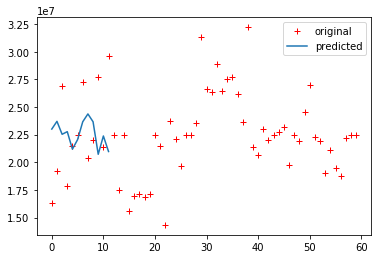

In [19]:
#ypred = reg.predict(model.params)
plt.plot(Y,"r+", label="original")
plt.plot(y_test_pred, label="predicted")
plt.legend()
plt.show()

In [20]:
import statsmodels.api as sm
X = sm.add_constant(X)
reg2=sm.OLS(Y,X)
model=reg2.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   NEFT   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2.962
Date:                Tue, 14 Apr 2020   Prob (F-statistic):             0.0399
Time:                        21:57:36   Log-Likelihood:                -989.86
No. Observations:                  60   AIC:                             1988.
Df Residuals:                      56   BIC:                             1996.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.689e+

C:\Users\navod\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
# remove craedit card pos count


intercept: [13569364.66192211]
coefficient: [[-0.07942422  9.59070969]]


RMSE TRAIN: 3412958.506642883
MSE TRAIN : 11648285768066.02


RMSE TEST : 4239901.501531236
MSE TEST : 17976764742686.83




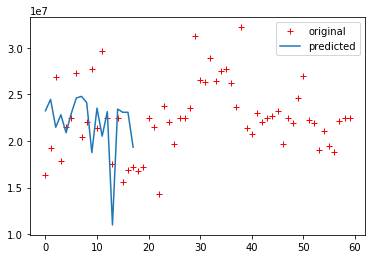

                            OLS Regression Results                            
Dep. Variable:                   NEFT   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4.479
Date:                Tue, 14 Apr 2020   Prob (F-statistic):             0.0156
Time:                        21:57:37   Log-Likelihood:                -989.90
No. Observations:                  60   AIC:                             1986.
Df Residuals:                      57   BIC:                             1992.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.717e+07 

C:\Users\navod\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
X=df1[['Debit Card POS Count','RTGS']]
Y=df1[['NEFT']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


X_train.shape,X_test.shape
print()


from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

print("intercept:",reg.intercept_)
print("coefficient:",reg.coef_)
print()
print()



y_train_pred = reg.predict(X_train)
RMSE_TRAIN = np.sqrt(np.mean((np.array(y_train) -np.array( y_train_pred))**2))
print("RMSE TRAIN:",RMSE_TRAIN)
MSE_TRAIN=RMSE_TRAIN**2
print("MSE TRAIN :",MSE_TRAIN)
print()
print()


y_test_pred=reg.predict(X_test)
RMSE_TEST = np.sqrt(np.mean((np.array(y_test) -np.array( y_test_pred))**2))
print("RMSE TEST :",RMSE_TEST)
MSE_TEST=RMSE_TEST**2
print("MSE TEST :",MSE_TEST)
print()
print()
#ypred = reg.predict(model.params)
plt.plot(Y,"r+", label="original")
plt.plot(y_test_pred, label="predicted")
plt.legend()
plt.show()


import statsmodels.api as sm
X = sm.add_constant(X)
reg2=sm.OLS(Y,X)
model=reg2.fit()
print(model.summary())
print()
print()
R_SQUARE=model.rsquared



In [23]:
# remove debit card pos count


intercept: [14864100.24240671]
coefficient: [[6.22760033]]


RMSE TRAIN: 3492607.2404271555
MSE TRAIN : 12198305335884.191


RMSE TEST : 3921807.471849035
MSE TEST : 15380573846250.92




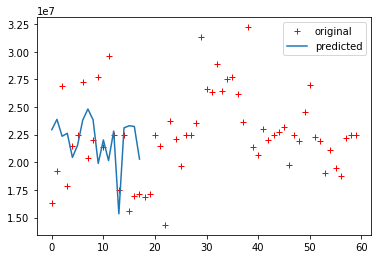

                                 OLS Regression Results                                
Dep. Variable:                   NEFT   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              957.5
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    3.61e-38
Time:                        21:57:39   Log-Likelihood:                         -1016.3
No. Observations:                  60   AIC:                                      2035.
Df Residuals:                      59   BIC:                                      2037.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
X=df1[['RTGS']]
Y=df1[['NEFT']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


X_train.shape,X_test.shape
print()


from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

print("intercept:",reg.intercept_)
print("coefficient:",reg.coef_)
print()
print()



y_train_pred = reg.predict(X_train)
RMSE_TRAIN = np.sqrt(np.mean((np.array(y_train) -np.array( y_train_pred))**2))
print("RMSE TRAIN:",RMSE_TRAIN)
MSE_TRAIN=RMSE_TRAIN**2
print("MSE TRAIN :",MSE_TRAIN)
print()
print()


y_test_pred=reg.predict(X_test)
RMSE_TEST = np.sqrt(np.mean((np.array(y_test) -np.array( y_test_pred))**2))
print("RMSE TEST :",RMSE_TEST)
MSE_TEST=RMSE_TEST**2
print("MSE TEST :",MSE_TEST)
print()
print()
#ypred = reg2.predict(model.params)
plt.plot(Y,"r+", label="original")
plt.plot(y_test_pred, label="predicted")
plt.legend()
plt.show()


import statsmodels.api as sm
reg2=sm.OLS(Y,X)
model=reg2.fit()
print(model.summary())
print()
print()

# Autoregressive and arima model on neft 

In [25]:
trans=pd.read_excel("REGNANDATA.xlsX",index_col=[0],parse_dates=[0])
trans.head()
#index_col=[0] making month column as index 

,Credit Card POS Count,Debit Card POS Count,RTGS,NEFT
year,,,,
2015-01-01,17947247.0,11151245.0,889032.0,16342282.0
2015-02-01,15602279.0,10288412.0,865068.0,19244474.0
2015-03-01,NaN,11582587.0,1072737.0,26906303.0
2015-04-01,18188579.0,12044987.0,895710.0,17862349.0
2015-05-01,19313259.0,13368953.0,NaN,21496984.0


In [26]:
trans.shape

(60, 4)

In [27]:
trans1=trans.drop(['Credit Card POS Count','Debit Card POS Count','RTGS'],axis=1)
trans1.head() # dropping the columns

,NEFT
year,
2015-01-01,16342282.0
2015-02-01,19244474.0
2015-03-01,26906303.0
2015-04-01,17862349.0
2015-05-01,21496984.0


In [28]:
trans1.info

<bound method DataFrame.info of                   NEFT
year                  
2015-01-01  16342282.0
2015-02-01  19244474.0
2015-03-01  26906303.0
2015-04-01  17862349.0
2015-05-01  21496984.0
2015-06-01         NaN
2015-07-01  27259275.0
2015-08-01  20404593.0
2015-09-01  22001627.0
2015-10-01  27704076.0
2015-11-01  21358112.0
2015-12-01  29624114.0
2016-01-01         NaN
2016-02-01  17505113.0
2016-03-01  22476796.0
2016-04-01  15613980.0
2016-05-01  16933262.0
2016-06-01  17158158.0
2016-07-01  16829622.0
2016-08-01  17173994.0
2016-09-01         NaN
2016-10-01  21491713.0
2016-11-01  14340240.0
2016-12-01  23709612.0
2017-01-01  22088818.0
2017-02-01  19699895.0
2017-03-01         NaN
2017-04-01         NaN
2017-05-01  23516146.0
2017-06-01  31307710.0
2017-07-01  26589512.0
2017-08-01  26315175.0
2017-09-01  28912695.0
2017-10-01  26431222.0
2017-11-01  27554602.0
2017-12-01  27681012.0
2018-01-01  26176565.0
2018-02-01  23664374.0
2018-03-01  32210856.0
2018-04-01  21381278.0
20

In [29]:
trans1.info()
trans1.isnull().sum() # checking null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
NEFT    52 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


NEFT    8
dtype: int64

In [30]:
trans3=trans1.fillna(trans1.mean())
trans3.head() # filling null values

,NEFT
year,
2015-01-01,16342282.0
2015-02-01,19244474.0
2015-03-01,26906303.0
2015-04-01,17862349.0
2015-05-01,21496984.0


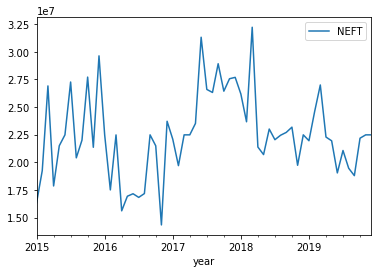

In [31]:
trans3.plot()

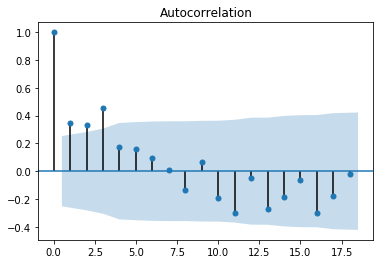

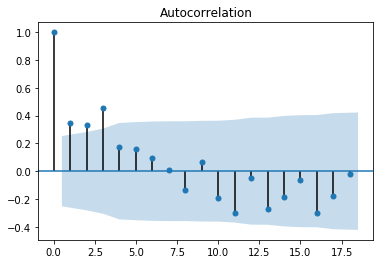

In [32]:
plot_acf(trans3) # acf is auto correlation function

In [33]:
trans3.shift(1).head()# shifted by 1

,NEFT
year,
2015-01-01,NaN
2015-02-01,16342282.0
2015-03-01,19244474.0
2015-04-01,26906303.0
2015-05-01,17862349.0


In [34]:
# stationary 
# ie mean, variance and covariance is contant over periods of time.
# as seen above, data is not stationary 

In [35]:
# converting series to stationary
trans3_diff=trans3.diff(periods=1)
trans3_diff.head()

,NEFT
year,
2015-01-01,NaN
2015-02-01,2902192.0
2015-03-01,7661829.0
2015-04-01,-9043954.0
2015-05-01,3634635.0


In [36]:
trans3_diff[1:].head() # not taking nan into account

,NEFT
year,
2015-02-01,2.902192e+06
2015-03-01,7.661829e+06
2015-04-01,-9.043954e+06
2015-05-01,3.634635e+06
2015-06-01,9.853526e+05


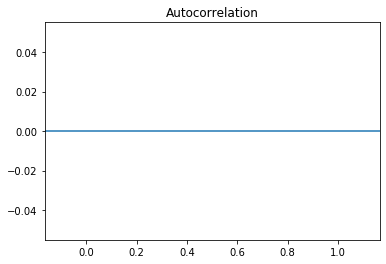

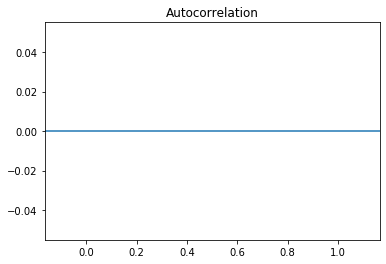

In [37]:
plot_acf(trans3_diff)

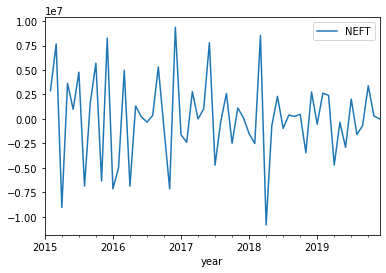

In [38]:
trans3_diff.plot() # data is stationary

In [39]:
X=trans3.values
X.size

60

In [40]:
# train test
train=X[0:48] # 48 to train
test=X[48:] # 12 data to test
predictions=[]

In [41]:
train.shape

(48, 1)

In [42]:
# autoregressive model

In [43]:
model_ar=AR(train)
model_ar_fit=model_ar.fit() # trained forecasting model

In [44]:
predictions=model_ar_fit.predict(start=48,end=59) # are predictions
predictions

array([20047475.80423213, 19697274.67981565, 22297164.38561325,
       20048192.89457413, 21223921.22314192, 21754989.42523872,
       21742415.09646622, 21374450.20295915, 22884794.07656729,
       22141405.08058   , 21827371.89271885, 23725436.30877527])

In [45]:
test # actual testing values

array([[21951684.        ],
       [24583891.        ],
       [26992077.        ],
       [22283593.        ],
       [21944022.        ],
       [19041509.        ],
       [21069043.        ],
       [19463566.        ],
       [18794704.        ],
       [22179625.        ],
       [22482336.63461538],
       [22482336.63461538]])

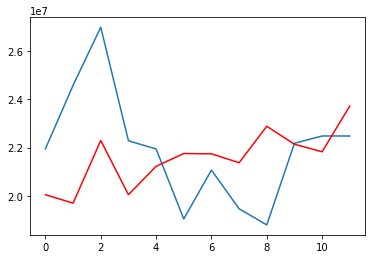

In [46]:
plt.plot(test) # last reading of actual graph is test 
plt.plot(predictions,color='red')

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(test, predictions)


2147112.429110894

In [49]:
# ARIMA model

In [50]:
# have to specify parameters 
# p = periods taken for autoregressive model
# d is integrated order ie how many times difference has done
# q is periods in moving average model
model_arima=ARIMA(train,order=(2,2,4))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

1534.6851772877833


In [51]:
predictions=model_arima_fit.forecast(steps=12)[0] # how many values to predict is steps
predictions

array([21037633.8468919 , 19726382.80518063, 22909248.77030492,
       20951878.56811539, 19615594.75754138, 22723596.64981511,
       20835397.44966303, 19475618.54234468, 22509398.66359384,
       20688222.99149706, 19306429.76726752, 22266646.79418569])

In [52]:
test # actual testing data

array([[21951684.        ],
       [24583891.        ],
       [26992077.        ],
       [22283593.        ],
       [21944022.        ],
       [19041509.        ],
       [21069043.        ],
       [19463566.        ],
       [18794704.        ],
       [22179625.        ],
       [22482336.63461538],
       [22482336.63461538]])

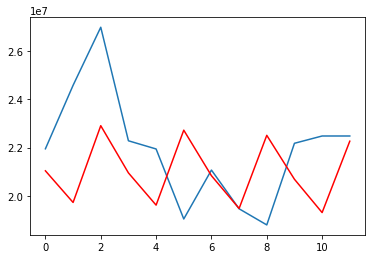

In [53]:
plt.plot(test) 
plt.plot(predictions,color='red')

In [54]:
mean_absolute_error(test, predictions)


2170000.6145280725

In [55]:
import itertools
p=d=q=range(0,5) # giving range to all values
pdq=list(itertools.product(p,d,q))
pdq # craeting combinations for p d and q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [56]:
import warnings
warnings.filterwarnings('ignore')
for para in pdq:
    try:
        model_arima=ARIMA(train,order=para)
        model_arima_fit=model_arima.fit()
        print(para,model_arima_fit.aic )
    except:
        continue
        
# now to see which combination is giving minimum value
# 1534 is minimu ie 2,2,4

(0, 0, 0) 1601.9600731781252
(0, 0, 1) 1599.7871806372045
(0, 0, 2) 1600.7171597264778
(0, 0, 3) 1584.3593546576044
(0, 0, 4) 1586.120489141057
(0, 1, 0) 1581.2885056600117
(0, 1, 1) 1563.6724511573802
(0, 2, 0) 1599.2233021310549
(0, 2, 1) 1554.5278402137094
(1, 0, 0) 1598.073949133875
(1, 0, 1) 1594.7445582688947
(1, 0, 2) 1592.5825634528746
(1, 0, 3) 1586.0748343370083
(1, 0, 4) 1587.8320427663225
(1, 1, 0) 1569.4530753458462
(1, 1, 1) 1564.3339500147222
(1, 1, 2) 1563.8270779372917
(1, 1, 3) 1559.3590941308391
(1, 1, 4) 1559.5074349992256
(1, 2, 0) 1576.3511145303203
(1, 2, 3) 1539.9516353877261
(2, 0, 0) 1596.5851948650989
(2, 0, 1) 1595.4779220954247
(2, 0, 2) 1593.192866275505
(2, 0, 3) 1587.779818291427
(2, 0, 4) 1589.2420114312185
(2, 1, 0) 1559.0650002603452
(2, 1, 1) 1561.0109299154406
(2, 1, 2) 1560.5211107187674
(2, 1, 3) 1560.6998111252399
(2, 1, 4) 1561.0151184685244
(2, 2, 0) 1550.1079337548404
(2, 2, 2) 1536.0657088283235
(2, 2, 4) 1534.6851772877833
(3, 0, 0) 1590.288

# Applying model on RTGS data 

In [57]:
trans1=trans.drop(['Credit Card POS Count','Debit Card POS Count','NEFT'],axis=1)
trans1.head()

,RTGS
year,
2015-01-01,889032.0
2015-02-01,865068.0
2015-03-01,1072737.0
2015-04-01,895710.0
2015-05-01,NaN


In [58]:
trans1.info

<bound method DataFrame.info of                     RTGS
year                    
2015-01-01  8.890320e+05
2015-02-01  8.650680e+05
2015-03-01  1.072737e+06
2015-04-01  8.957100e+05
2015-05-01           NaN
2015-06-01  9.428240e+05
2015-07-01  9.247040e+05
2015-08-01  8.715950e+05
2015-09-01  8.647650e+05
2015-10-01  9.115520e+05
2015-11-01  8.500670e+05
2015-12-01  8.958400e+05
2016-01-01  8.838190e+05
2016-02-01  8.671410e+05
2016-03-01           NaN
2016-04-01  8.791920e+05
2016-05-01  9.091520e+05
2016-06-01  9.170200e+05
2016-07-01  8.507010e+05
2016-08-01  8.703140e+05
2016-09-01  8.613360e+05
2016-10-01  8.953340e+05
2016-11-01  8.086140e+05
2016-12-01  9.415530e+05
2017-01-01  9.688150e+05
2017-02-01  9.320190e+05
2017-03-01  1.298079e+06
2017-04-01  9.629060e+05
2017-05-01  1.246330e+06
2017-06-01           NaN
2017-07-01  1.278638e+06
2017-08-01  1.278067e+06
2017-09-01  1.279626e+06
2017-10-01  1.324499e+06
2017-11-01  1.438522e+06
2017-12-01  1.448132e+06
2018-01-01  1.4582

In [59]:
trans1.info()
trans1.isnull().sum() # checking null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
RTGS    55 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


RTGS    5
dtype: int64

In [60]:
trans3=trans1.fillna(trans1.mean())
trans3.head() # filling null values

,RTGS
year,
2015-01-01,8.890320e+05
2015-02-01,8.650680e+05
2015-03-01,1.072737e+06
2015-04-01,8.957100e+05
2015-05-01,1.149440e+06


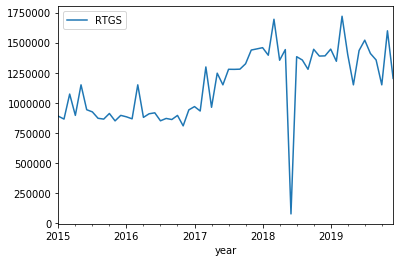

In [61]:
trans3.plot()

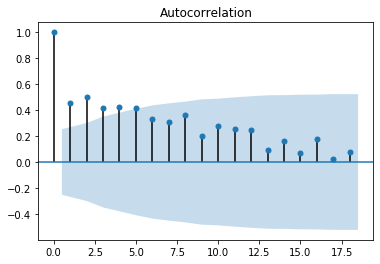

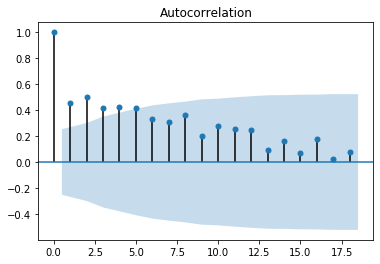

In [62]:
plot_acf(trans3) # autocorrelation graph

In [63]:
trans3.shift(1).head() # shifting by 1

,RTGS
year,
2015-01-01,NaN
2015-02-01,889032.0
2015-03-01,865068.0
2015-04-01,1072737.0
2015-05-01,895710.0


In [64]:
# converting series to stationary
trans3_diff=trans3.diff(periods=1)
trans3_diff.head()

,RTGS
year,
2015-01-01,NaN
2015-02-01,-23964.000000
2015-03-01,207669.000000
2015-04-01,-177027.000000
2015-05-01,253729.760331


In [65]:
trans3_diff[1:].head() # not taking nan into account

,RTGS
year,
2015-02-01,-23964.000000
2015-03-01,207669.000000
2015-04-01,-177027.000000
2015-05-01,253729.760331
2015-06-01,-206615.760331


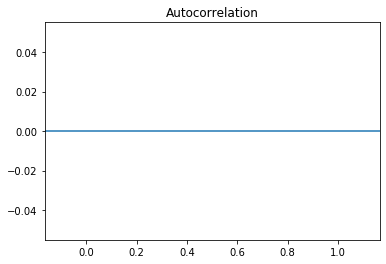

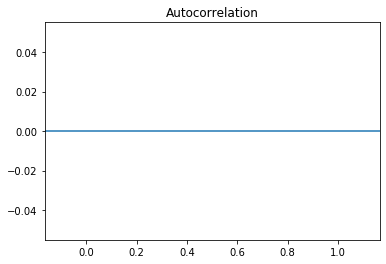

In [66]:
plot_acf(trans3_diff) # now stationary data

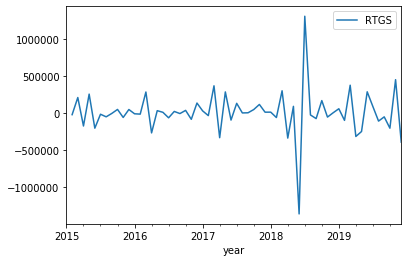

In [67]:
trans3_diff.plot() # data is stationary

In [68]:
X=trans3.values
X.size

60

In [69]:
# train test
train=X[0:48] # 48 to train
test=X[48:] # 12 data to test
predictions=[]

In [70]:
train.shape

(48, 1)

In [71]:
# autoregressive model

In [72]:
model_ar=AR(train)
model_ar_fit=model_ar.fit() # trained forecasting model

In [73]:
predictions=model_ar_fit.predict(start=48,end=59) # are predictions
predictions

array([1479134.80854391, 1180895.72544751, 1292735.58675193,
       1198360.51875378, 1296657.41139014, 1300770.06491151,
       1296395.49786244, 1321605.5755597 , 1343460.21820287,
       1320981.02165582, 1329855.36212317, 1289481.72898852])

In [74]:
test # actual test data

array([[1446177.        ],
       [1345201.        ],
       [1719295.        ],
       [1400911.        ],
       [1149439.76033058],
       [1434504.        ],
       [1520526.        ],
       [1409754.        ],
       [1356047.        ],
       [1149439.76033058],
       [1598339.        ],
       [1202795.81818182]])

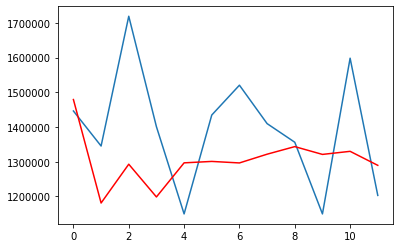

In [75]:
plt.plot(test) # last reading of actual graph is test 
plt.plot(predictions,color='red')

In [76]:
mean_absolute_error(test, predictions)


163241.75684354088

In [77]:
# ARIMA model

In [78]:
# have to specify parameters 
# p = periods taken for autoregressive model
# d is integrated order ie how many times difference has done
# q is periods in moving average model
model_arima=ARIMA(train,order=(4,2,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

1302.6832466059284


In [79]:
predictions=model_arima_fit.forecast(steps=12)[0]# how many values to predict is steps
predictions

array([1395079.10613601, 1420222.56265096, 1446050.5712167 ,
       1430833.83785252, 1456417.41081758, 1467304.09096738,
       1486030.98351509, 1495978.87771519, 1509389.54197497,
       1529095.77311578, 1543054.41984339, 1560670.05034244])

In [80]:
test 

array([[1446177.        ],
       [1345201.        ],
       [1719295.        ],
       [1400911.        ],
       [1149439.76033058],
       [1434504.        ],
       [1520526.        ],
       [1409754.        ],
       [1356047.        ],
       [1149439.76033058],
       [1598339.        ],
       [1202795.81818182]])

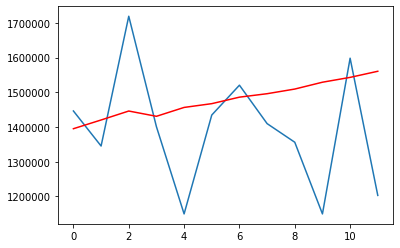

In [81]:
plt.plot(test) 
plt.plot(predictions,color='red')

In [82]:
mean_absolute_error(test, predictions)


152995.14382355454

In [83]:
import itertools
p=d=q=range(0,5) # giving range to all values
pdq=list(itertools.product(p,d,q))
pdq # craeting combinations for p d and q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [84]:
import warnings
warnings.filterwarnings('ignore')
for para in pdq:
    try:
        model_arima=ARIMA(train,order=para)
        model_arima_fit=model_arima.fit()
        print(para,model_arima_fit.aic )
    except:
        continue
        

(0, 0, 0) 1344.210115112573
(0, 0, 1) 1342.0854820852269
(0, 0, 2) 1337.7495728891045
(0, 0, 3) 1339.0987661060735
(0, 0, 4) 1339.2861686383458
(0, 1, 0) 1326.472211401835
(0, 1, 1) 1304.2469514529546
(0, 1, 2) 1305.954574493394
(0, 2, 0) 1352.094268006212
(0, 2, 1) nan
(1, 0, 0) 1338.8604585925927
(1, 0, 1) 1333.3672591073241
(1, 0, 2) 1335.031062980398
(1, 1, 0) 1310.0069581009764
(1, 1, 1) 1305.6688036639252
(1, 2, 0) 1317.8325479087332
(2, 0, 0) 1333.8544582309496
(2, 0, 1) 1334.8727053086086
(2, 0, 2) 1336.4778746255001
(2, 1, 0) 1309.965595072529
(2, 1, 1) 1305.0224051555797
(2, 1, 2) 1309.9546970956587
(2, 1, 3) 1308.3501622201215
(2, 1, 4) 1476.5167933653283
(2, 2, 0) 1309.4625320453051
(3, 0, 0) 1335.4815406118537
(3, 0, 1) 1336.330539412278
(3, 0, 2) 1338.2570218063856
(3, 0, 3) 1337.1470748785587
(3, 0, 4) 1338.9646258568291
(3, 1, 0) 1310.2949237376056
(3, 1, 3) 1315.0843458780878
(3, 2, 0) 1305.9282164063043
(3, 2, 1) 1290.942143575407
(4, 0, 0) 1337.0223661243904
(4, 0, 1

# Applying same model on debit card data

In [85]:
trans1=trans.drop(['Credit Card POS Count','RTGS','NEFT'],axis=1)
trans1.head()

,Debit Card POS Count
year,
2015-01-01,11151245.0
2015-02-01,10288412.0
2015-03-01,11582587.0
2015-04-01,12044987.0
2015-05-01,13368953.0


In [86]:
trans1.info

<bound method DataFrame.info of             Debit Card POS Count
year                            
2015-01-01          1.115124e+07
2015-02-01          1.028841e+07
2015-03-01          1.158259e+07
2015-04-01          1.204499e+07
2015-05-01          1.336895e+07
2015-06-01          1.270660e+07
2015-07-01          1.407879e+07
2015-08-01                   NaN
2015-09-01          1.367185e+07
2015-10-01          1.543931e+07
2015-11-01          1.514283e+07
2015-12-01          1.609404e+07
2016-01-01          1.594897e+07
2016-02-01          1.553119e+07
2016-03-01          1.692938e+07
2016-04-01          1.716631e+07
2016-05-01                   NaN
2016-06-01          1.823920e+07
2016-07-01          2.011266e+07
2016-08-01          1.947607e+07
2016-09-01          1.916967e+07
2016-10-01          2.206363e+07
2016-11-01          3.231012e+07
2016-12-01          4.896211e+07
2017-01-01          4.023678e+07
2017-02-01          3.231979e+07
2017-03-01          3.491968e+07
2017-04-01 

In [87]:
trans1.info()
trans1.isnull().sum() # checking null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
Debit Card POS Count    56 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


Debit Card POS Count    4
dtype: int64

In [88]:
trans3=trans1.fillna(trans1.mean())
trans3.head() # filling null values using fillna

,Debit Card POS Count
year,
2015-01-01,11151245.0
2015-02-01,10288412.0
2015-03-01,11582587.0
2015-04-01,12044987.0
2015-05-01,13368953.0


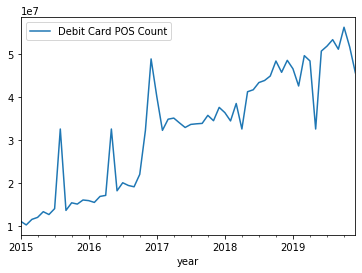

In [89]:
trans3.plot() # can see from graph that data is not stationary

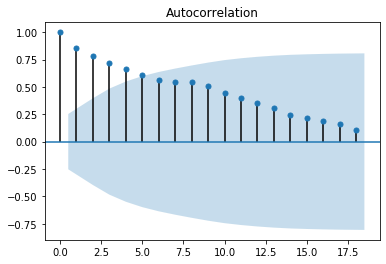

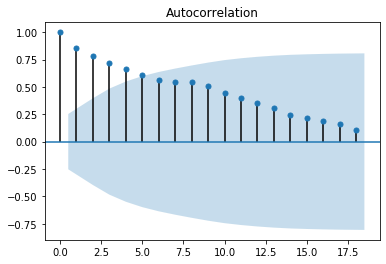

In [90]:
plot_acf(trans3) # plotting auto correlation graph and can say that data is not stationary

In [91]:
trans3.shift(1).head() # shift by 1

,Debit Card POS Count
year,
2015-01-01,NaN
2015-02-01,11151245.0
2015-03-01,10288412.0
2015-04-01,11582587.0
2015-05-01,12044987.0


In [92]:
# converting series to stationary
trans3_diff=trans3.diff(periods=1) 
trans3_diff.head()

,Debit Card POS Count
year,
2015-01-01,NaN
2015-02-01,-862833.0
2015-03-01,1294175.0
2015-04-01,462400.0
2015-05-01,1323966.0


In [93]:
trans3_diff[1:].head()  # not taking nan into account

,Debit Card POS Count
year,
2015-02-01,-862833.0
2015-03-01,1294175.0
2015-04-01,462400.0
2015-05-01,1323966.0
2015-06-01,-662354.0


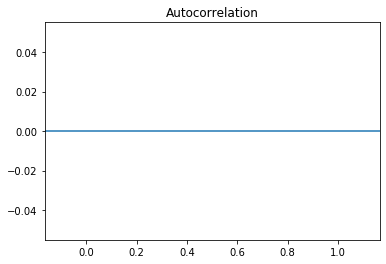

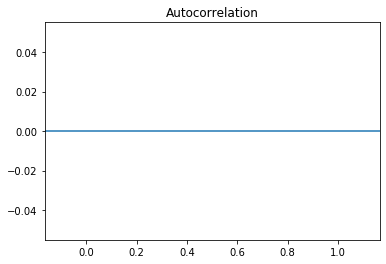

In [94]:
plot_acf(trans3_diff) # can see that data is stationary now

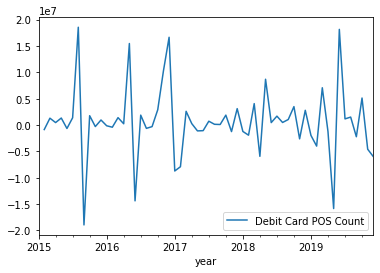

In [95]:
trans3_diff.plot() # data is stationary

In [96]:
X=trans3.values
X.size

60

In [97]:
# train test
train=X[0:48] # 48 to train
test=X[48:] # 12 data to test
predictions=[]

In [98]:
train.shape

(48, 1)

In [99]:
# autoregressive model

In [100]:
model_ar=AR(train)
model_ar_fit=model_ar.fit() # trained forecasting model
predictions=model_ar_fit.predict(start=48,end=59) # are predictions
predictions

array([46214619.68902491, 48421070.86184712, 48782285.83534953,
       49311240.80721341, 50535975.45219308, 50017484.25828055,
       52097090.85028489, 50897193.88474555, 52411971.90318327,
       52092633.98969604, 52897234.22807485, 53615589.52595426])

In [101]:
test

array([[46661439.        ],
       [42658714.        ],
       [49727712.        ],
       [48489873.        ],
       [32632983.80844156],
       [50782996.        ],
       [51944501.        ],
       [53448447.        ],
       [51222390.        ],
       [56342664.        ],
       [51743567.        ],
       [45729300.27272727]])

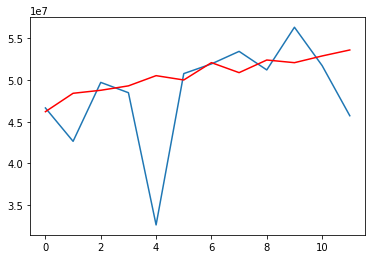

In [102]:
plt.plot(test) # last reading of actual graph is test 
plt.plot(predictions,color='red')

In [103]:
mean_absolute_error(test, predictions)


3652323.740873789

In [104]:
# ARIMA model

In [105]:
model_arima=ARIMA(train,order=(1,2,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

1602.4728880925984


In [106]:
predictions=model_arima_fit.forecast(steps=12)[0]# how many values to predict is steps
predictions

array([48336513.31623308, 49999153.27504066, 50622685.89441957,
       51989943.52758944, 53042157.18178059, 54408097.01478498,
       55714355.87732872, 57182688.72613318, 58681402.15113345,
       60288704.79537833, 61958150.96470196, 63717323.32033531])

In [107]:
test

array([[46661439.        ],
       [42658714.        ],
       [49727712.        ],
       [48489873.        ],
       [32632983.80844156],
       [50782996.        ],
       [51944501.        ],
       [53448447.        ],
       [51222390.        ],
       [56342664.        ],
       [51743567.        ],
       [45729300.27272727]])

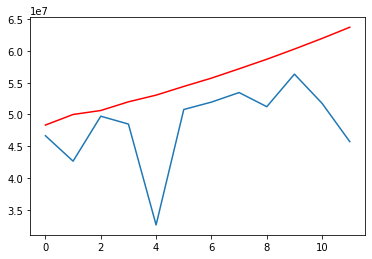

In [108]:
plt.plot(test) 
plt.plot(predictions,color='red')

In [109]:
mean_absolute_error(test, predictions)


7046382.413640871

In [110]:
import itertools
p=d=q=range(0,5) # giving range to all values
pdq=list(itertools.product(p,d,q))
pdq # craeting combinations for p d and q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [111]:
import warnings
warnings.filterwarnings('ignore')
for para in pdq:
    try:
        model_arima=ARIMA(train,order=para)
        model_arima_fit=model_arima.fit()
        print(para,model_arima_fit.aic )
    except:
        continue
        

(0, 0, 0) 1705.5596853382108
(0, 0, 1) 1677.6528237173966
(0, 0, 2) 1666.1355486633834
(0, 0, 3) 1661.374755660952
(0, 0, 4) 1658.3129170482075
(0, 1, 0) 1608.7859701421776
(0, 1, 1) 1600.6331506225767
(0, 1, 2) 1597.614875292221
(0, 1, 3) 1598.7683917134027
(0, 2, 0) 1620.9557235837926
(0, 2, 1) 1582.0252315575312
(1, 0, 0) 1644.8561428558774
(1, 0, 1) 1642.1425885018107
(1, 0, 2) 1643.851195404783
(1, 1, 0) 1605.0670273123728
(1, 2, 0) 1602.4728880925984
(1, 2, 1) 1578.4564534315832
(2, 0, 0) 1643.3254590092656
(2, 0, 1) 1643.8048245612745
(2, 0, 2) 1643.246121023737
(2, 0, 3) 1647.763163725453
(2, 0, 4) 1646.7344275506416
(2, 1, 0) 1605.2293990037033
(2, 1, 1) 1598.6600155886306
(2, 1, 2) 1598.3677345995757
(2, 1, 3) 1606.5108543357176
(2, 2, 0) 1596.186861970419
(2, 2, 1) 1581.5080864505483
(3, 0, 0) 1644.5616161570283
(3, 0, 1) 1645.7979916098661
(3, 0, 2) 1644.673990720447
(3, 0, 3) 1646.3829160046494
(3, 0, 4) 1645.6260565654334
(3, 1, 0) 1605.8674231623631
(3, 1, 1) 1600.565186

# Applying model on credit card data

In [112]:
trans1=trans.drop(['Debit Card POS Count','RTGS','NEFT'],axis=1)
trans1.head()

,Credit Card POS Count
year,
2015-01-01,17947247.0
2015-02-01,15602279.0
2015-03-01,NaN
2015-04-01,18188579.0
2015-05-01,19313259.0


In [113]:
trans1.info

<bound method DataFrame.info of             Credit Card POS Count
year                             
2015-01-01           1.794725e+07
2015-02-01           1.560228e+07
2015-03-01                    NaN
2015-04-01           1.818858e+07
2015-05-01           1.931326e+07
2015-06-01           1.967094e+07
2015-07-01           2.076948e+07
2015-08-01           2.112415e+07
2015-09-01                    NaN
2015-10-01           2.179146e+07
2015-11-01           2.092794e+07
2015-12-01           2.184293e+07
2016-01-01           2.230062e+07
2016-02-01           2.115451e+07
2016-03-01           2.274063e+07
2016-04-01           2.293904e+07
2016-05-01           2.463266e+07
2016-06-01                    NaN
2016-07-01           2.519649e+07
2016-08-01           2.603548e+07
2016-09-01           2.423264e+07
2016-10-01           2.755747e+07
2016-11-01           2.997034e+07
2016-12-01           3.520275e+07
2017-01-01           3.245846e+07
2017-02-01           2.750491e+07
2017-03-01      

In [114]:
trans1.info()
trans1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
Credit Card POS Count    54 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


Credit Card POS Count    6
dtype: int64

In [115]:
trans3=trans1.fillna(trans1.mean())
trans3.head()

,Credit Card POS Count
year,
2015-01-01,1.794725e+07
2015-02-01,1.560228e+07
2015-03-01,3.273981e+07
2015-04-01,1.818858e+07
2015-05-01,1.931326e+07


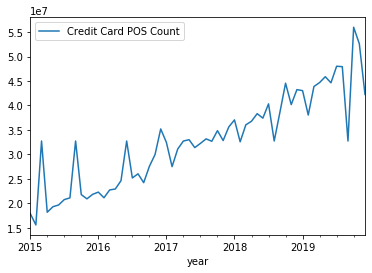

In [116]:
trans3.plot()

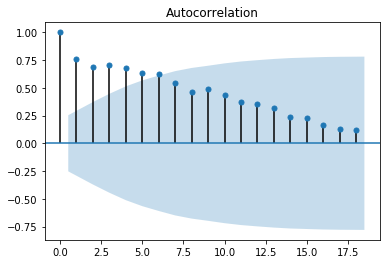

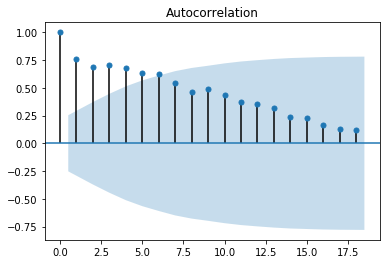

In [117]:
plot_acf(trans3)

In [118]:
trans3.shift(1).head()

,Credit Card POS Count
year,
2015-01-01,NaN
2015-02-01,1.794725e+07
2015-03-01,1.560228e+07
2015-04-01,3.273981e+07
2015-05-01,1.818858e+07


In [119]:
# converting series to stationary
trans3_diff=trans3.diff(periods=1) 
trans3_diff.head()

,Credit Card POS Count
year,
2015-01-01,NaN
2015-02-01,-2.344968e+06
2015-03-01,1.713753e+07
2015-04-01,-1.455123e+07
2015-05-01,1.124680e+06


In [120]:
trans3_diff[1:].head() 

,Credit Card POS Count
year,
2015-02-01,-2.344968e+06
2015-03-01,1.713753e+07
2015-04-01,-1.455123e+07
2015-05-01,1.124680e+06
2015-06-01,3.576830e+05


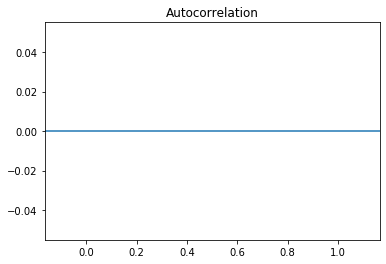

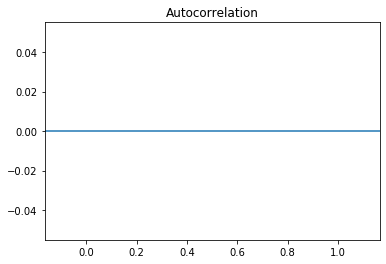

In [121]:
plot_acf(trans3_diff)

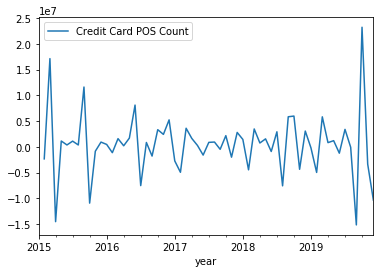

In [122]:
trans3_diff.plot() # data is stationary

In [123]:
X=trans3.values
X.size

60

In [124]:
# train test
train=X[0:48] # 48 to train
test=X[48:] # 12 data to test
predictions=[]

In [125]:
train.shape

(48, 1)

In [126]:
# autoregressive model from stats 

In [127]:
model_ar=AR(train)
model_ar_fit=model_ar.fit() # trained forecasting model

In [128]:
predictions=model_ar_fit.predict(start=48,end=59) # are predictions
predictions

array([41165077.98277882, 41752752.69289614, 41942584.22110966,
       45930500.56522825, 42689618.99924275, 44967185.39034256,
       46589529.71927777, 45993862.64075617, 47389946.37746191,
       47401999.56672655, 47861417.4563292 , 48126675.84066765])

In [129]:
test

array([[43027816.        ],
       [38045263.        ],
       [43869321.        ],
       [44680208.        ],
       [45870315.        ],
       [44627028.        ],
       [48011222.        ],
       [47923500.        ],
       [32739809.04208754],
       [55975511.        ],
       [52598907.        ],
       [42239008.27272727]])

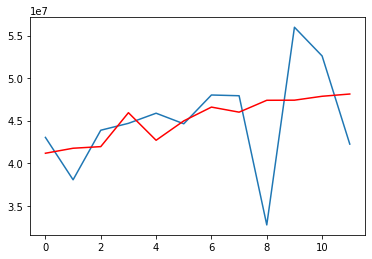

In [130]:
plt.plot(test) # last reading of actual graph is test 
plt.plot(predictions,color='red')

In [131]:
mean_absolute_error(test, predictions)


4122353.8304633987

In [132]:
# ARIMA model

In [133]:
model_arima=ARIMA(train,order=(4,2,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

1547.0287701824532


In [134]:
predictions=model_arima_fit.forecast(steps=12)[0]# how many values to predict is steps
predictions

array([41095631.51616804, 43185383.57969352, 44669557.01883265,
       44250521.17803951, 45259079.97609255, 45479704.29220898,
       46496922.46168467, 47265386.55552419, 47703896.22726376,
       48440691.57359859, 49067889.373602  , 49836170.40929686])

In [135]:
test

array([[43027816.        ],
       [38045263.        ],
       [43869321.        ],
       [44680208.        ],
       [45870315.        ],
       [44627028.        ],
       [48011222.        ],
       [47923500.        ],
       [32739809.04208754],
       [55975511.        ],
       [52598907.        ],
       [42239008.27272727]])

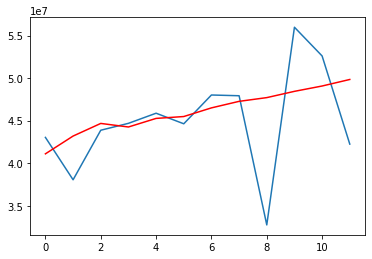

In [136]:
plt.plot(test) 
plt.plot(predictions,color='red')

In [137]:
mean_absolute_error(test, predictions)


3797136.548147617

In [138]:
import itertools
p=d=q=range(0,5) # giving range to all values
pdq=list(itertools.product(p,d,q))
pdq # creating combinations for p d and q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for para in pdq:
    try:
        model_arima=ARIMA(train,order=para)
        model_arima_fit=model_arima.fit()
        print(para,model_arima_fit.aic )
    except:
        continue
        

(0, 0, 0) 1657.0701261283953
(0, 0, 1) 1639.699752956472
(0, 0, 2) 1634.523501505656
(0, 0, 3) 1624.927256071056
(0, 0, 4) 1623.0257861545756
(0, 1, 0) 1588.51416085072
(0, 1, 1) 1557.7060048053502
(0, 2, 0) 1605.7764865136935
(0, 2, 1) 1561.9179794128088
